In [464]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [465]:
data = pd.read_csv("task_3_training_e8da4715deef7d56_f8b7378_generic.csv")
data_filtered = data[[c for c in data.columns if 'gemmes' not in c ]]
data_filtered = data_filtered[[c for c in data_filtered.columns if 'gems' not in c ]]
correlation = data.corr()
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(correlation, 50))
def get_bottom_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]

print("Bottom Absolute Correlations")
print(get_bottom_abs_correlations(correlation, 50))
def get_all_abs_correlations(df):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr
ordered_corr = get_all_abs_correlations(correlation)

print(ordered_corr[:60])
def get_all_abs_correlations_desc(df):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr
ordered_corr_desc = get_all_abs_correlations_desc(correlation)
features_to_exclude = ['midlevel_features_tonal_stability','midlevel_features_dissonance','essentia_strong_peak_stdev','librosa_chroma_pct_10_3','librosa_chroma_pct_50_0','librosa_chroma_pct_50_1','librosa_chroma_pct_50_2','librosa_chroma_pct_50_3','librosa_chroma_pct_50_4','librosa_chroma_pct_50_5','librosa_chroma_pct_50_6','librosa_chroma_pct_50_7','librosa_chroma_pct_50_8','librosa_chroma_pct_50_9','librosa_chroma_pct_50_10','librosa_chroma_pct_50_11','mirtoolbox_hcdf_pct_50','mirtoolbox_novelty_pct_50','mirtoolbox_novelty_std','mirtoolbox_novelty_pct_90','mirtoolbox_roughness_pct_10','mirtoolbox_roughness_pct_50','mirtoolbox_roughness_pct_90','mirtoolbox_dynamics_mean','mirtoolbox_dynamics_pct_10','mirtoolbox_dynamics_pct_50','mirtoolbox_dynamics_pct_90','librosa_mfcc_std_1','librosa_mfcc_std_7','librosa_mfcc_std_8','librosa_mfcc_std_9','librosa_mfcc_std_10','librosa_mfcc_std_11','librosa_mfcc_pct_50_8','librosa_mfcc_pct_50_9','librosa_mfcc_pct_50_10','librosa_mfcc_pct_50_11','librosa_mfcc_pct_50_6','librosa_mfcc_pct_50_7','librosa_mfcc_pct_50_1','librosa_mfcc_pct_90_3','librosa_mfcc_pct_90_4','librosa_mfcc_pct_90_5','librosa_mfcc_pct_10_8','librosa_mfcc_pct_10_6','librosa_mfcc_pct_50_5','librosa_mfcc_pct_10_5','librosa_mfcc_pct_50_4','librosa_mfcc_pct_10_4','librosa_mfcc_pct_10_3','librosa_mfcc_pct_50_3','librosa_mfcc_pct_10_1','librosa_mfcc_pct_10_2','librosa_mfcc_pct_50_2','librosa_mfcc_pct_90_2','librosa_mfcc_pct_10_0','librosa_mfcc_pct_50_0','librosa_mfcc_pct_90_0','librosa_mfcc_mean_0','librosa_mfcc_mean_2']

data_filtered = data_filtered.loc[:, ~data_filtered.columns.isin(data_filtered.filter(features_to_exclude))]
data_targets = data_filtered.loc[:, data_filtered.columns.isin(data_filtered.filter(['arousal', 'valence', 'quadrant']))]
X = data_filtered.loc[:, ~data_filtered.columns.isin(data_filtered.filter(['arousal', 'valence', 'quadrant']))]
feature_names = list(X.columns)

Top Absolute Correlations
librosa_mfcc_mean_0         librosa_mfcc_pct_50_0          0.999967
librosa_mfcc_mean_2         librosa_mfcc_pct_50_2          0.999935
librosa_mfcc_mean_6         librosa_mfcc_pct_50_6          0.999857
mirtoolbox_roughness_mean   mirtoolbox_roughness_pct_50    0.999846
librosa_mfcc_mean_7         librosa_mfcc_pct_50_7          0.999777
librosa_mfcc_mean_3         librosa_mfcc_pct_50_3          0.999716
mirtoolbox_dynamics_mean    mirtoolbox_dynamics_pct_50     0.999591
librosa_mfcc_mean_8         librosa_mfcc_pct_50_8          0.999548
librosa_mfcc_mean_5         librosa_mfcc_pct_50_5          0.999521
librosa_mfcc_mean_1         librosa_mfcc_pct_50_1          0.999304
librosa_mfcc_mean_10        librosa_mfcc_pct_50_10         0.998856
mirtoolbox_dynamics_pct_50  mirtoolbox_dynamics_pct_90     0.998853
librosa_mfcc_mean_9         librosa_mfcc_pct_50_9          0.998843
mirtoolbox_dynamics_mean    mirtoolbox_dynamics_pct_10     0.998588
                      

In [466]:
y = data_targets['quadrant'].to_numpy()
y = y.ravel()
y

array([3., 3., 3., ..., 1., 1., 1.])

In [468]:
X = X.to_numpy()

In [469]:
kf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 2)
for train_index, test_index in kf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

In [470]:

#clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)  
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [471]:
y_predict = clf_model.predict(X_test)

In [472]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.5219298245614035


In [473]:
target = (list(data_targets['quadrant'].unique()))
for i in range(len(target)):
    target[i]=str(target[i])
print(target)

['3.0', '1.0', '2.0', '4.0']


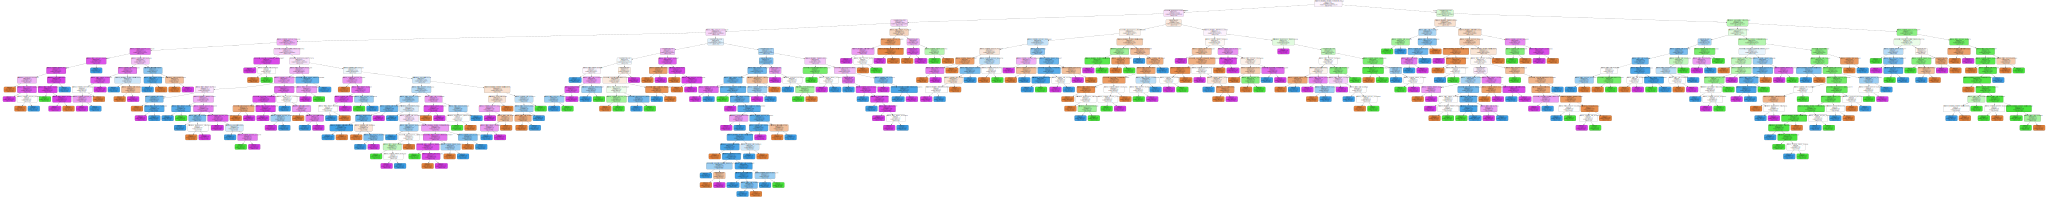

In [474]:

from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf_model,
                                out_file=None, 
                        feature_names=feature_names,  
                      class_names=target,
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  

graph

In [475]:
from sklearn.tree import export_text
r = export_text(clf_model)
print(r)

|--- feature_94 <= -0.16
|   |--- feature_6 <= 44616146.00
|   |   |--- feature_1 <= 25.50
|   |   |   |--- feature_90 <= -11.26
|   |   |   |   |--- feature_28 <= 0.04
|   |   |   |   |   |--- feature_64 <= 0.62
|   |   |   |   |   |   |--- feature_91 <= 12.35
|   |   |   |   |   |   |   |--- feature_30 <= 0.17
|   |   |   |   |   |   |   |   |--- feature_102 <= 0.09
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- feature_102 >  0.09
|   |   |   |   |   |   |   |   |   |--- feature_67 <= 261.47
|   |   |   |   |   |   |   |   |   |   |--- class: 4.0
|   |   |   |   |   |   |   |   |   |--- feature_67 >  261.47
|   |   |   |   |   |   |   |   |   |   |--- feature_52 <= 0.58
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |   |   |--- feature_52 >  0.58
|   |   |   |   |   |   |   |   |   |   |   |--- class: 3.0
|   |   |   |   |   |   |   |--- feature_30 >  0.17
|   |   |   |   |   |   |   |   |--- fea